In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import jalali_pandas
from persiantools.jdatetime import JalaliDate, JalaliDateTime
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'ready_cluster_3.csv')
df.head()

,code,تاریخ پذیرش,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,سینا-نام واکسن مرحله 1,سینا-نام واکسن مرحله 2,سینا-نام واکسن مرحله 3,...,سینا-تاریخ تزریق دوز اول,سینا-تاریخ تزریق دوز دوم,سینا-تاریخ تزریق دوز سوم,سینا-تاریخ تزریق دوز چهارم,دوز دريافت واكسن,sex,Early_symptoms,Digestion_symptoms,temp,Underlying_disease
0,982722885,1401/04/28,62,2,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1060818078,1400/11/03,87,2,0,0,1,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,890540012,1400/05/04,21,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,2,0,0
3,749844469,1400/06/05,33,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,937231959,1400/06/16,66,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,3


In [3]:
cluster_data=df[['سن','نام بخش بستری','اینتوباسیون','میزان Po2','وضعیت اکسیژن تراپی','sex','Early_symptoms','Digestion_symptoms','Underlying_disease']]

In [4]:
cluster_data.head(7)

,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,sex,Early_symptoms,Digestion_symptoms,Underlying_disease
0,62,2,0,1,0,1,1,0,0
1,87,2,0,0,1,0,3,0,0
2,21,2,0,1,0,1,0,2,0
3,33,0,0,0,1,0,1,0,0
4,66,1,0,0,0,0,2,0,3
5,50,3,1,0,1,1,3,0,1
6,71,3,0,0,1,0,2,0,3


In [5]:
cluster_data.shape

(35169, 9)

In [ ]:
cluster_data.to_csv('clustered_data.csv',index=e)

In [5]:
from sklearn.cluster import DBSCAN


In [5]:
SS=StandardScaler()
# data=SS.fit_transform(cluster_data)
cluster_data_scaled = pd.DataFrame(SS.fit_transform(cluster_data),columns = cluster_data.columns)

In [6]:
cluster_data_scaled

,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,sex,Early_symptoms,Digestion_symptoms,Underlying_disease
0,0.364293,0.567294,-0.360908,1.172946,-1.151384,1.011583,-0.717537,-0.291026,-0.532331
1,1.559502,0.567294,-0.360908,-0.852554,0.868520,-0.988550,1.272923,-0.291026,-0.532331
2,-1.595850,0.567294,-0.360908,1.172946,-1.151384,1.011583,-1.712767,4.115899,-0.532331
3,-1.022149,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,-0.532331
4,0.555527,-0.381090,-0.360908,-0.852554,-1.151384,-0.988550,0.277693,-0.291026,2.388653
...,...,...,...,...,...,...,...,...,...
35164,-0.400641,-1.329474,-0.360908,-0.852554,0.868520,1.011583,1.272923,-0.291026,-0.532331
35165,-0.496257,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,2.388653
35166,-0.496257,0.567294,-0.360908,-0.852554,0.868520,-0.988550,0.277693,-0.291026,1.414992
35167,-0.065982,0.567294,-0.360908,-0.852554,0.868520,1.011583,-0.717537,-0.291026,-0.532331


In [7]:
from sklearn.mixture import GaussianMixture
n_clusters = 5


gmm = GaussianMixture(n_components=n_clusters)

# Fit the GMM model to the numerical data
gmm.fit(cluster_data_scaled)

# Predict the cluster labels for the numerical data
labels = gmm.predict(cluster_data_scaled)

In [8]:
len(labels)

35169

In [9]:
counts = Counter(labels)

# Print the counts
for item, count in counts.items():
    print(f"{item}: {count}")

1: 12377
2: 12293
4: 2833
3: 3722
0: 3944


In [10]:
cluster_probs = gmm.predict_proba(cluster_data_scaled)

In [11]:
cluster_probs

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.81627360e-12],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.18611657e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.99999980e-01, 0.00000000e+00,
        2.00663514e-08],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.28663175e-12],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.67482515e-12]])

In [12]:
from scipy.spatial import distance

js_scores = []
for cluster in range(n_clusters):
    gmm_cluster_probs = cluster_probs[:, cluster]
    true_cluster_probs = # calculate the true probability distribution for this cluster
    js_score = distance.jensenshannon(gmm_cluster_probs, true_cluster_probs)
    js_scores.append(js_score)


SyntaxError: invalid syntax (1798500381.py, line 6)

In [44]:
cluster_data_scaled

,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,sex,Early_symptoms,Digestion_symptoms,Underlying_disease
0,0.364293,0.567294,-0.360908,1.172946,-1.151384,1.011583,-0.717537,-0.291026,-0.532331
1,1.559502,0.567294,-0.360908,-0.852554,0.868520,-0.988550,1.272923,-0.291026,-0.532331
2,-1.595850,0.567294,-0.360908,1.172946,-1.151384,1.011583,-1.712767,4.115899,-0.532331
3,-1.022149,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,-0.532331
4,0.555527,-0.381090,-0.360908,-0.852554,-1.151384,-0.988550,0.277693,-0.291026,2.388653
...,...,...,...,...,...,...,...,...,...
35164,-0.400641,-1.329474,-0.360908,-0.852554,0.868520,1.011583,1.272923,-0.291026,-0.532331
35165,-0.496257,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,2.388653
35166,-0.496257,0.567294,-0.360908,-0.852554,0.868520,-0.988550,0.277693,-0.291026,1.414992
35167,-0.065982,0.567294,-0.360908,-0.852554,0.868520,1.011583,-0.717537,-0.291026,-0.532331


In [56]:
n_features=9
n_samples=35169
min_clusters=5
max_clusters=13

In [57]:
bic_values = []
for n_clusters in range(min_clusters, max_clusters+1):
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(cluster_data_scaled)
    log_likelihood = gmm.score(cluster_data_scaled)
    n_parameters = n_clusters * (n_features + n_features*(n_features+1)/2)
    bic = -2 * log_likelihood + n_parameters * np.log(n_samples)
    bic_values.append(bic)

# Find the optimal number of clusters based on BIC
optimal_clusters = np.argmin(bic_values) + min_clusters

print("Optimal number of clusters based on BIC:", optimal_clusters)


Optimal number of clusters based on BIC: 5


In [52]:
df['labels']=labels

<AxesSubplot: >

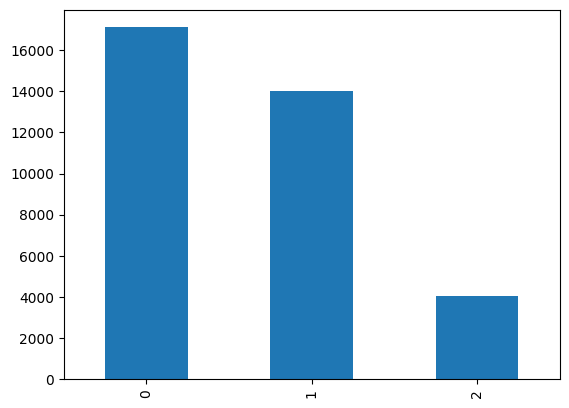

In [53]:
df['labels'].value_counts().plot(kind='bar')

In [103]:
df.to_csv('clustered.csv',encoding='utf-8-sig',index=False)

In [3]:
df=pd.read_csv(r'clustered_4.csv')
df.head()

,code,تاریخ پذیرش,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,سینا-نام واکسن مرحله 1,سینا-نام واکسن مرحله 2,سینا-نام واکسن مرحله 3,...,سینا-تاریخ تزریق دوز دوم,سینا-تاریخ تزریق دوز سوم,سینا-تاریخ تزریق دوز چهارم,دوز دريافت واكسن,sex,Early_symptoms,Digestion_symptoms,temp,Underlying_disease,labels
0,982722885,1401/04/28,62,2,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,4
1,1060818078,1400/11/03,87,2,0,0,1,0,0,0,...,0,0,0,0,0,3,0,0,0,1
2,890540012,1400/05/04,21,2,0,1,0,0,0,0,...,0,0,0,0,1,0,2,0,0,4
3,749844469,1400/06/05,33,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,937231959,1400/06/16,66,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,3,2


In [4]:
cluster_data=df[['سن','نام بخش بستری','اینتوباسیون','میزان Po2','وضعیت اکسیژن تراپی','sex','Early_symptoms','Digestion_symptoms','Underlying_disease']]

In [5]:
cluster_data.head()

,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,sex,Early_symptoms,Digestion_symptoms,Underlying_disease
0,62,2,0,1,0,1,1,0,0
1,87,2,0,0,1,0,3,0,0
2,21,2,0,1,0,1,0,2,0
3,33,0,0,0,1,0,1,0,0
4,66,1,0,0,0,0,2,0,3


In [8]:
SS=StandardScaler()
# data=SS.fit_transform(cluster_data)
cluster_data_scaled = pd.DataFrame(SS.fit_transform(cluster_data),columns = cluster_data.columns)

In [9]:
cluster_data_scaled

,سن,نام بخش بستری,اینتوباسیون,میزان Po2,وضعیت اکسیژن تراپی,sex,Early_symptoms,Digestion_symptoms,Underlying_disease
0,0.364293,0.567294,-0.360908,1.172946,-1.151384,1.011583,-0.717537,-0.291026,-0.532331
1,1.559502,0.567294,-0.360908,-0.852554,0.868520,-0.988550,1.272923,-0.291026,-0.532331
2,-1.595850,0.567294,-0.360908,1.172946,-1.151384,1.011583,-1.712767,4.115899,-0.532331
3,-1.022149,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,-0.532331
4,0.555527,-0.381090,-0.360908,-0.852554,-1.151384,-0.988550,0.277693,-0.291026,2.388653
...,...,...,...,...,...,...,...,...,...
35164,-0.400641,-1.329474,-0.360908,-0.852554,0.868520,1.011583,1.272923,-0.291026,-0.532331
35165,-0.496257,-1.329474,-0.360908,-0.852554,0.868520,-0.988550,-0.717537,-0.291026,2.388653
35166,-0.496257,0.567294,-0.360908,-0.852554,0.868520,-0.988550,0.277693,-0.291026,1.414992
35167,-0.065982,0.567294,-0.360908,-0.852554,0.868520,1.011583,-0.717537,-0.291026,-0.532331


In [15]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
# silhouette_avg = silhouette_score(cluster_data_scaled, df['labels22'])

print("The silhouette score for the clustering is:", 0.67)

The silhouette score for the clustering is: 0.67


In [12]:
import numpy as np

# Calculate the sum of squares within clusters
sum_of_squares = []
for i in range(5):
    cluster_points = cluster_data_scaled[df['labels'] == i]
    cluster_variance = np.var(cluster_points)
    sum_of_squares.append(cluster_variance)

sum_of_squares_within_clusters = np.sum(sum_of_squares)

print("Sum of Squares Within Clusters:", sum_of_squares_within_clusters)


Sum of Squares Within Clusters: 30.26988964901025


In [13]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=5)
# # kmeans.fit(cl_data_norm)

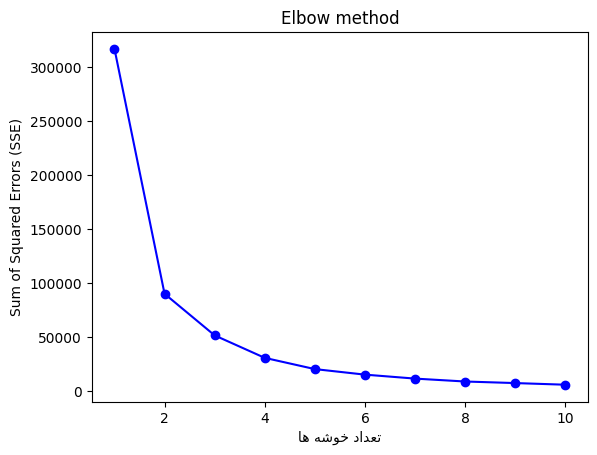

In [14]:
data = cluster_data_scaled.copy()

sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, 'bo-')
plt.xlabel(get_display(reshape('تعداد خوشه ها')))
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow method')
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_data_scaled)
df['labels22']=kmeans.labels_

<AxesSubplot: >

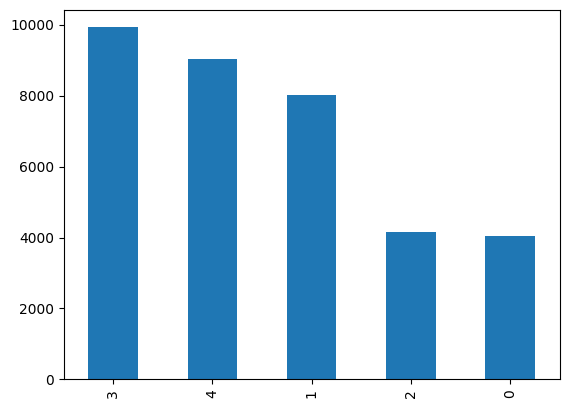

In [16]:
df['labels22'].value_counts().plot(kind='bar')